In [1]:
from matplotlib import pyplot as plt
from pandas import read_csv

In [2]:
source = read_csv("./data/test_data.csv", index_col=0, parse_dates=True)
open = read_csv("dead_reckoning.csv", index_col=0, parse_dates=True)
ins = read_csv("ins.csv", index_col=0, parse_dates=True)

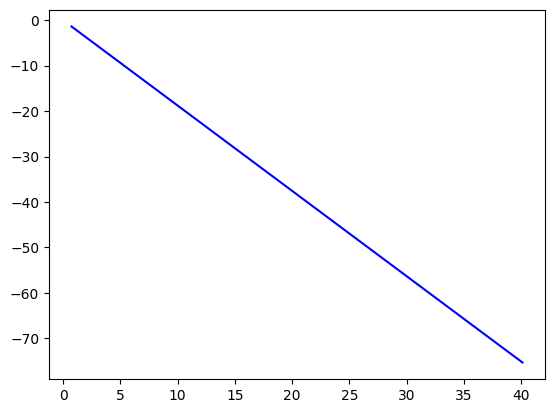

In [3]:
plt.plot(ins["longitude"], ins["latitude"], label="INS", color="blue")

Text(0, 0.5, 'Latitude')

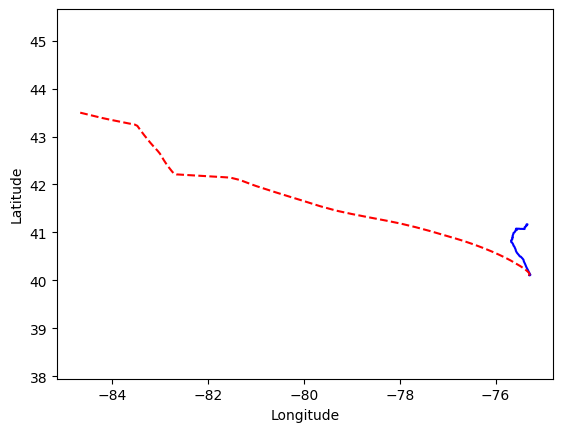

In [4]:
plt.plot(source["longitude"], source["latitude"], linestyle="-", color="blue", label="Path")
plt.plot(open["longitude"], open["latitude"], linestyle="--", color="red", label="Dead Reckoning")
plt.axis("equal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


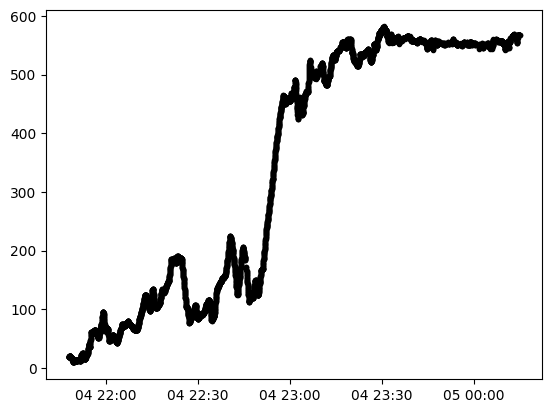

In [5]:
plt.plot(source['altitude'], '.k')

In [6]:
import numpy as np
from scipy.linalg import sqrtm
from scipy import linalg

In [7]:
covar = np.array([
    [4, 0, 0],
    [0, 9, 0],
    [0, 0, 16]
])
x = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])
a = np.array([[2, 1.1], [1.1, 2]])
b = np.array([
    [-1.0, 0.0, -1.0,],
    [0.0, -1.0, 0.0,],
    [-1.0, 0.0, -1.0]
])
c = np.diag([0.06619803753533118, 0.06619803753533118, 3.0]) #, 0.1944944411516189, 0.1944944411516189, 0.1944944411516189, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])
n = 3
alpha = 1e-3
beta = 2
kappa = 0.0
L = alpha ** 2 *(n + kappa) - n
#wm = np.array([L/(n+L)])
mu = np.array([-75.29421658658254, 40.10469331426311, 19.209774887863908])


In [8]:
covar = np.array([-2.32504917049778e-10, 1.0805824305790577e-10, 4.856494743051981e-10, 1.8803246682509624e-8, 3.597056563356237e-10, 9.758396708666915e-10, -4.552158527515144e-12, -9.637803870761772e-12, -1.1816769065689794e-12, -1.1950846724623203e-23, -2.3628478095702352e-23, 1.1975292223365143e-23, 0.0, 0.0, 0.0, 1.0805824305790577e-10, -5.022046144496581e-11, -2.2551886126166617e-10, -8.72660990009561e-9, -1.3907279030255965e-10, -4.5314722171413103e-10, 2.1156487759940787e-12, 4.479228201950448e-12, 5.49191716597627e-13, 5.543503655995346e-24, 1.096001931092016e-23, -5.5548142368337915e-24, 0.0, 0.0, 0.0, 4.856494743051981e-10, -2.2551886126166617e-10, 4.2238264560788575e-16, 1.7178837499005717e-14, -1.9527517755138704e-16, 8.467662170892544e-16, 9.50150467204603e-12, 2.0108264850918526e-11, 2.4645836739287103e-12, -9.23152329794927e-25, -2.417557791163276e-24, 9.536980030209656e-25, 0.0, 0.0, 0.0, 1.8803246682509627e-8, -8.72660990009561e-9, 1.7178837499005717e-14, 1.5918183347513684e-7, 4.562135569917611e-7, -3.497989909728996e-10, 3.6785279568362674e-10, 7.783526018540254e-10, 9.540761755442671e-11, -2.245679396424389e-21, -4.499806872245722e-21, 2.2510570318791334e-21, 0.0, 0.0, 0.0, 3.5970565633562374e-10, -1.3907279030255965e-10, -1.9527517755138704e-16, 4.562135569917611e-7, 2.892134312495304e-6, 2.5162382878517198e-11, 7.457319217459488e-12, 1.4778056787915162e-11, 1.8401413140809035e-12, -1.0227025899087096e-21, -2.0489425162207887e-21, 1.0274941880466897e-21, 0.0, 0.0, 0.0, 9.758396708666917e-10, -4.5314722171413103e-10, 8.467662170892544e-16, -3.497989909728996e-10, 2.51623828785174e-11, 1.4710315476402572e-12, 1.9092220650316438e-11, 4.040524181386314e-11, 4.952278562947883e-12, -2.9920959434592716e-23, -6.109976595817238e-23, 2.9775911767596425e-23, 0.0, 0.0, 0.0, -4.552158527515144e-12, 2.1156487759940783e-12, 9.501504672046028e-12, 3.678527956836267e-10, 7.457319217459488e-12, 1.9092220650316435e-11, -8.912499857426756e-14, -1.8869595355254217e-13, -2.3135671291921057e-14, -2.3322144263387607e-25, -4.610928306934083e-25, 2.33696893998844e-25, 0.0, 0.0, 0.0, -9.637803870761772e-12, 4.479228201950447e-12, 2.0108264850918526e-11, 7.783526018540254e-10, 1.4778056787915162e-11, 4.040524181386313e-11, -1.8869595355254217e-13, -3.9950536781850283e-13, -4.898280493193244e-14, -4.939641525850761e-25, -9.766003598232147e-25, 4.94971547940265e-25, 0.0, 0.0, 0.0, -1.1816769065689794e-12, 5.49191716597627e-13, 2.4645836739287103e-12, 9.54076175544267e-11, 1.8401413140809035e-12, 4.952278562947881e-12, -2.3135671291921057e-14, -4.898280493193244e-14, -6.005275699106898e-15, -6.036947674825899e-26, -1.1934980329192097e-25, 6.049271058224402e-26, 0.0, 0.0, 0.0, -1.1950846724623297e-23, 5.54350675792269e-24, -9.485633184009208e-25, -2.2424267899070555e-21, -1.023515741538043e-21, -3.0022603388638046e-23, -2.332214426338761e-25, -4.939641525850761e-25, -6.036947674825899e-26, 5.999999999772856e-8, 1.6239877666287574e-29, 9.199759683187698e-23, 0.0, 0.0, 0.0, -2.3628502911120727e-23, 1.0960025514774755e-23, -2.442968779579937e-24, -4.503059478763055e-21, -2.0497556678440637e-21, -6.109976595779373e-23, -4.610928306934083e-25, -9.766002628879882e-25, -1.1934980329192244e-25, 1.6239877666287574e-29, 5.999999999772856e-8, -1.636193111087284e-29, 0.0, 0.0, 0.0, 1.197529222336533e-23, -5.554814236833803e-24, 9.536980030209627e-25, 2.2510570319033674e-21, 1.0274941880466897e-21, 2.977591176759643e-23, 2.3369689399884543e-25, 4.94971547940265e-25, 6.049271058224402e-26, 9.199759683793543e-23, -1.6374048014376576e-29, 5.999999999772856e-8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.999999999772854e-8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.999999999772854e-8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.999999999772854e-8]).reshape(15, 15)

In [9]:
sqrtm(covar)

array([[ 1.27710253e-05+5.33817105e-05j, -5.93002676e-06-2.47878492e-05j,
         1.51648024e-06-6.05050420e-06j,  5.79454434e-05-1.32149463e-05j,
        -7.45262496e-06+2.07309160e-06j,  3.05036593e-06-1.30500001e-05j,
         2.49793732e-07+1.04426305e-06j,  5.28722357e-07+2.20995394e-06j,
         6.48233477e-08+2.70843282e-07j,  7.33151856e-19-4.16692382e-19j,
         1.46467471e-18-8.35561188e-19j, -7.31428917e-19+4.17579191e-19j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-5.93002676e-06-2.47878492e-05j,  2.75398500e-06+1.15114057e-05j,
        -7.09673054e-07+2.80967174e-06j, -2.69038294e-05+6.13648058e-06j,
         3.47679018e-06-9.62658957e-07j, -1.41440917e-06+6.05985645e-06j,
        -1.16099454e-07-4.84746271e-07j, -2.45513383e-07-1.02620327e-06j,
        -3.00428797e-08-1.25861957e-07j, -3.34080821e-19+1.93494931e-19j,
        -6.62373520e-19+3.88000550e-19j,  3.22015274e-19-1.93906729e-1

In [10]:
sqrt = sqrtm((n+L)*c)

In [11]:
mu + sqrt

array([[-75.29377095,  40.10469331,  19.20977489],
       [-75.29421659,  40.10513895,  19.20977489],
       [-75.29421659,  40.10469331,  19.21277489]])

In [12]:
L / (n + L) + 1 - alpha ** 2 + beta

-999996.0000092518

In [13]:
np.diag(sqrtm((n+L) * c))

array([0.00044564, 0.00044564, 0.003     ])

In [14]:
linalg.cholesky(a, lower=True)

array([[1.41421356, 0.        ],
       [0.77781746, 1.18110118]])

In [15]:
sqrtm(a)

array([[1.35468249, 0.40599919],
       [0.40599919, 1.35468249]])

In [16]:
np.cos(np.radians(45))

np.float64(0.7071067811865476)

In [17]:
sqrtm(covar)

array([[ 1.27710253e-05+5.33817105e-05j, -5.93002676e-06-2.47878492e-05j,
         1.51648024e-06-6.05050420e-06j,  5.79454434e-05-1.32149463e-05j,
        -7.45262496e-06+2.07309160e-06j,  3.05036593e-06-1.30500001e-05j,
         2.49793732e-07+1.04426305e-06j,  5.28722357e-07+2.20995394e-06j,
         6.48233477e-08+2.70843282e-07j,  7.33151856e-19-4.16692382e-19j,
         1.46467471e-18-8.35561188e-19j, -7.31428917e-19+4.17579191e-19j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-5.93002676e-06-2.47878492e-05j,  2.75398500e-06+1.15114057e-05j,
        -7.09673054e-07+2.80967174e-06j, -2.69038294e-05+6.13648058e-06j,
         3.47679018e-06-9.62658957e-07j, -1.41440917e-06+6.05985645e-06j,
        -1.16099454e-07-4.84746271e-07j, -2.45513383e-07-1.02620327e-06j,
        -3.00428797e-08-1.25861957e-07j, -3.34080821e-19+1.93494931e-19j,
        -6.62373520e-19+3.88000550e-19j,  3.22015274e-19-1.93906729e-1

In [18]:
covar = np.diag([0.06619803753533118, 0.06619803753533118, 3.0, 0.1944944411516189, 0.1944944411516189, 0.1944944411516189, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])
sqrt = sqrtm(covar)

In [19]:
np.rad2deg(-1.3141)

np.float64(-75.29238385814148)